In [0]:
# REQUIRES DATASET MENTIONED IN THE WEBSITE BELOW

# https://towardsdatascience.com/hands-on-bayesian-statistics-with-python-pymc3-arviz-499db9a59501

In [2]:
!pip install -q arviz

     |████████████████████████████████| 1.5MB 8.1MB/s 
     |████████████████████████████████| 4.1MB 69kB/s 
     |████████████████████████████████| 337kB 66.6MB/s 


In [3]:
from scipy import stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print ("running on PyMC3 v{}".format(pm.__version__))

running on PyMC3 v3.7


In [0]:
data = pd.read_csv("/content/downloadedData.csv")

In [6]:
data.head(5)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-22 08:00:25,MADRID,SEVILLA,2019-04-28 08:30:00,2019-04-28 11:14:00,ALVIA,NaN,Turista,Flexible
1,2019-04-22 10:03:24,MADRID,VALENCIA,2019-05-20 06:45:00,2019-05-20 08:38:00,AVE,21.95,Turista,Promo
2,2019-04-25 19:19:46,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
3,2019-04-24 06:21:57,SEVILLA,MADRID,2019-05-03 08:35:00,2019-05-03 15:26:00,LD-MD,34.35,Turista con enlace,Promo +
4,2019-04-19 21:13:55,VALENCIA,MADRID,2019-05-10 09:40:00,2019-05-10 11:20:00,AVE,45.30,Turista,Promo


In [0]:
data = data.sample(frac=0.01, random_state=99)


In [8]:
data.head(3)

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
4738,2019-04-17 08:03:35,VALENCIA,MADRID,2019-05-21 08:00:00,2019-05-21 09:47:00,AVE,33.65,Turista,Promo
8722,2019-05-09 07:12:41,MADRID,BARCELONA,2019-05-25 08:30:00,2019-05-25 11:15:00,AVE,85.10,Turista,Promo
13185,2019-04-24 11:21:26,MADRID,VALENCIA,2019-05-22 17:40:00,2019-05-22 19:20:00,AVE,51.15,Turista,Promo


In [9]:
data.isnull().sum()/len(data)

insert_date    0.000000
origin         0.000000
destination    0.000000
start_date     0.000000
end_date       0.000000
train_type     0.000000
price          0.096899
train_class    0.000000
fare           0.000000
dtype: float64

In [0]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])
data['price'] = data.groupby('fare').transform(lambda x: x.fillna(x.mean()))

([<matplotlib.axis.YTick at 0x7f95d9a804a8>],
 <a list of 1 Text major ticklabel objects>)

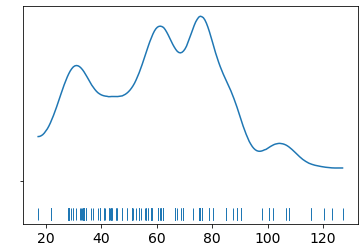

In [11]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0)

In [0]:
from scipy.stats import norm

x = np.array([3.4, 5.7, 8.8, 5, 3, 5.6, 7.9, 0.9, 3.3, 2.8, 1.7, 7.6, 5.9, 3.5, 4, 4.8])


In [0]:
minimum = np.min(x)
maximum = np.max(x)

#x_axis = np.arange(minimum, maximum, 5000)

x_axis = np.linspace(minimum, maximum, 1000)

y_axis = []

for i in range(len(x)):
  if i == 0:
    y_axis = (np.exp(-1*np.square((x_axis - x[i])/2.0)))/np.sqrt(2*np.pi)
  else:
    y_axis += (np.exp(-1*np.square((x_axis - x[i])/2.0)))/np.sqrt(2*np.pi)
  
    


    #y_axis = np.exp(-np.square(x_axis-x[i])/2)/(np.sqrt(2*np.pi))
    #else:
    #y_axis += np.exp(-np.square(x_axis-x[i])/2)/(np.sqrt(2*np.pi))


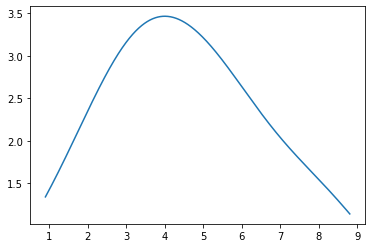

In [49]:
plt.plot(x_axis, y_axis)